In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Let's use the code provided below to generate a dataset representing two populations, each sampled from a Guassian with a specific population mean. Here I am generating only 5 samples

In [2]:
set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 12, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

measure,site_name
<dbl>,<chr>
10.29120,Site 1
11.38886,Site 1
10.64901,Site 1
11.47788,Site 1
10.43872,Site 1
12.52232,Site 2
11.95539,Site 2
13.48441,Site 2
10.40899,Site 2


* I compute the mean of the dataset above using the following code:
  * feel free to deconstruct the code to see what each chunk does.


In [9]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 10.84913

[1] 12.11935

* Use the `tapply` function instead of the code above to compute the means samples from "Site 1" and those from site 2
  * See tapply for help if needed.

In [6]:
# Write your code here

site_num <- factor(complete_data$site_name, labels = c("Site 1", "Site 2"))
measure <- complete_data$measure

In [8]:
mean_site <- tapply(measure, site_num, mean)
mean_site

Site 1   Site 2 
10.84913 12.11935

Q.2 

* Use the bootstrapping-procedure covered in class to assess whether there is a statistically significant difference between the data in `Site 1` and that in `Site 2`.

Make sure you follow the approach discussed in class and which consists of:

1. Selecting an appropriate test statistic
2. Bootstrapping a a distribuion for the observed statistic under the null hypothesis
3. Desciding whether to accept or reject the null based on the probability of the null
4. provide a p-value to support your decision.


In [26]:
# make site 1 and 2 vectors
site_1 <- (complete_data[complete_data$site_name == "Site 1", ]$measure)

site_2 <- (complete_data[complete_data$site_name == "Site 2", ]$measure)

In [59]:
#t.test
t.test(site_1, site_2)


	Welch Two Sample t-test

data:  site_1 and site_2
t = -2.2822, df = 5.8275, p-value = 0.0639
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.6419581  0.1015228
sample estimates:
mean of x mean of y 
 10.84913  12.11935 


In [ ]:
# Reject Null, p value = 0.06

In [33]:
set.seed(110)
data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 13, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)


#### Q2.0 

Complete the following by describing the null and the alternative hypotheses we are testing here.


In [ ]:
### Write your answer here

#### Q.2.1 

Produce a graph similar the one below (geom_density) display the distributions. If you're using the same seed as mine, your graph will look exactly the same as the one below 

![](https://www.dropbox.com/s/rz5jxm84kk8ac1m/dist.png?dl=1)

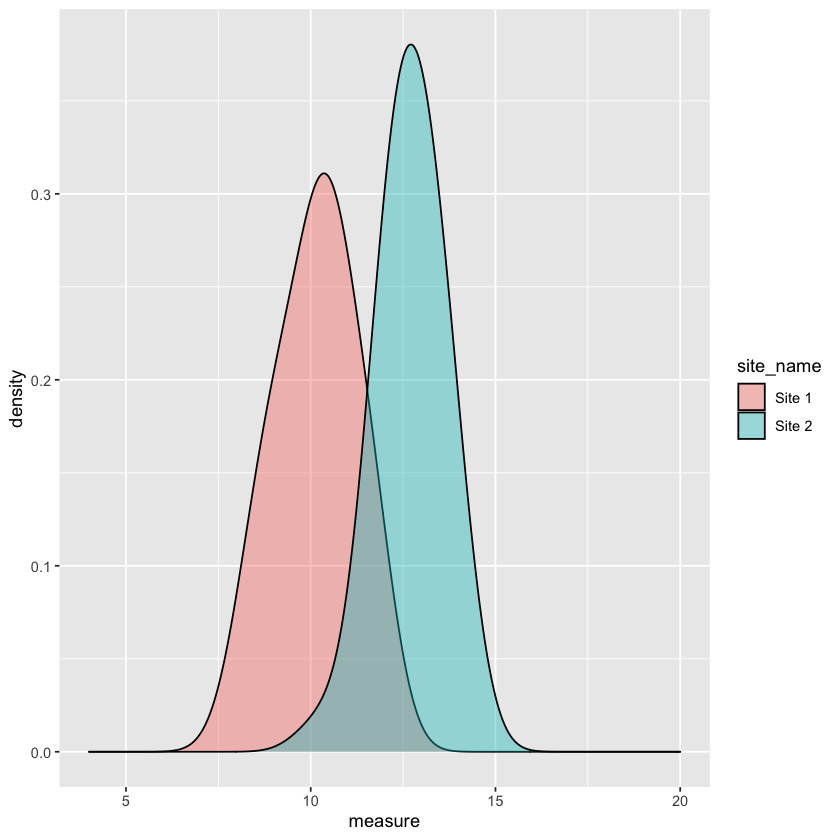

In [72]:
# write your code here
set.seed(110)

ggplot(complete_data, aes(x=measure, fill = site_name)) + 
geom_density(alpha = 0.4, bw = 0.65) +
xlim(4,20)
                                     

In [71]:
t.test(data_1$measure, data_2$measure)


	Welch Two Sample t-test

data:  data_1$measure and data_2$measure
t = -12.056, df = 74.217, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.975853 -2.131763
sample estimates:
mean of x mean of y 
 10.14979  12.70360 


Q2.2 Select a proper test statistic and produce a distribution of the statistic under the null hypothesis. Plot the data as both a histogram and density curves. Your graph may look like this.

![](https://www.dropbox.com/s/3jarqg9swneai0r/mean_under_null.png?dl=1)

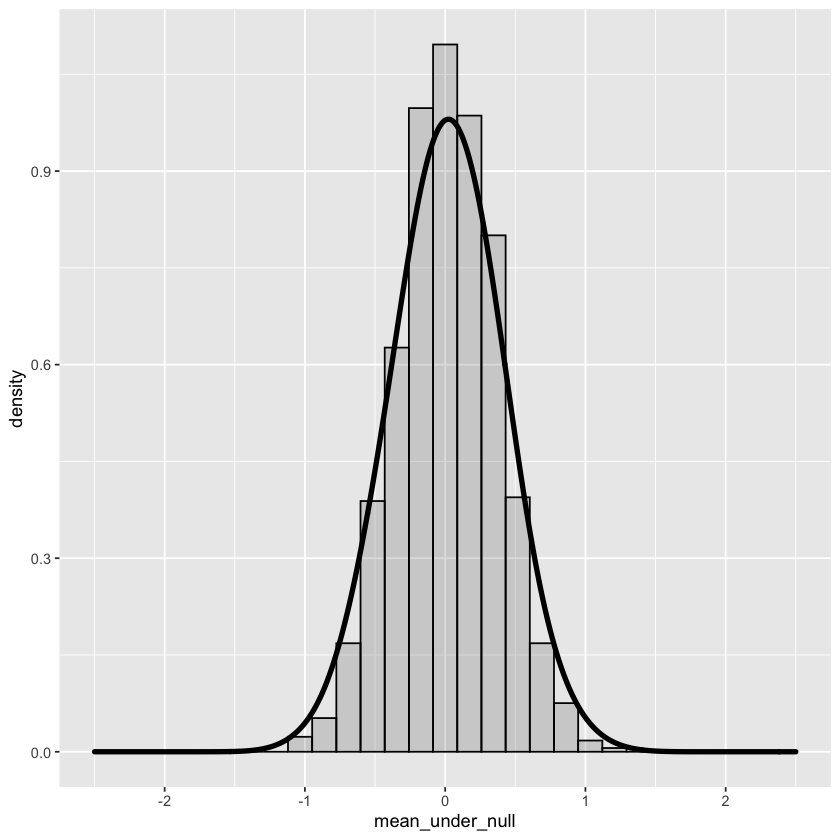

In [8]:
# Write your code here


####  Q2.3. 

Calculate and plot the observed statistic on the graph you created in Q.2.2. 


In [ ]:
#### Q2.4 
compute the p-vlaue of the observed statistic under the null. What do you conclude about the hypotheses you enunciated in Q

#### Q.3 

* The proportion of the of _P. lobata_, _M. capitata_ and _P. mendrina_ at a site X are c(0.60, 0.19, 0.21).
* You surveyed site Y with different environmental conditions and obtains the following proportions for the three corals (0.61, 0.19, 0.20). Use the multinomial non-parametric hypotheses test to assess whether the proportions obtained at sites X and Y are statistically different.


Although not explicitly required, your test should cover all the steps in Q2, i.e. appropriate graph(s) when possible, test statistics, and conclusion.